# Room acoustics

## Basic theory

The rooms in which we perceive sound affect the sound we hear.

There is a sound source and an observer

Sound is released from source in all directions, a direct line reaches the observer, followed by reflections off walls and other objects.

You can model this with ray-tracing
(ignores refraction and other wave effects, FD-TD methods)

## Linear Time-Invariance

Because this model treats room acoustical responses as a set of delay lines depending on path taken from source -> reflections -> observer it is _linear time-invariant_

### Linearity

The linear aspect of this means the following two properties hold [source](https://ccrma.stanford.edu/~jos/fp/Superposition.html)

Superposition:

    When two signals are added together and fed to the filter, the filter output is the same as if one had put each signal through the filter separately and then added the outputs (the superposition property). 
    
Scaling:

    The amplitude of the output is proportional to the amplitude of the input (the scaling property).

### Time invariant 
Means that the system will not change with time. A sound delayed by N samples will have an output after being recorded in the room that's the same other than also being delayed by N samples.


## LTI systems and convolution

Importantly (as noted in first para of wikipedia page on LTI systems)

the response $y(t)$ of the system to an arbitrary input $x(t)$ can be found directly using convolution: $y(t) = x(t) ∗ h(t)$ where h(t) is called the system's impulse response and $∗$ represents convolution

This means (because of convolution theory) an LTI system will only rescale individual magnitude and phase components of the Fourier transform of a signal, and will have a _frequency response_ defined by the Fourier transform of the impulse response.

In [40]:
import numpy as np
import IPython.display as ipd
import scipy
import librosa.display

x = np.array([1.,0.,0.,0.,0.])
X = np.fft.fft(x)
np.abs(X)

array([1., 1., 1., 1., 1.])

## Reverberation Time

The amount of time it takes for a reverbed signal to drop by 60dB (1/1000) ($T_60$)

How echo-y a room sounds. Varies by frequency but we take an average.

Concert hall ~2s
St Pauls 11s or 8s

Exponential decay a rough approximation for impulse response

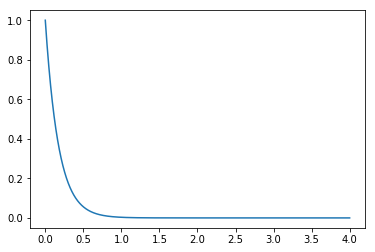

In [32]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt

Fs = 22050

def exp_decay(reverb_time, T, ratio=10e-6):
    a = -np.log(ratio)
    t = np.linspace(0, T, int(T*Fs))
    return np.exp(-a*t/reverb_time)

concert_hall_ir = exp_decay(2,4)
st_pauls_ir = exp_decay(12,4)

plt.plot(np.linspace(0, 4, int(4*Fs)), concert_hall_ir)

We can now convolve these with our 'dry' source signal (recorded in a not-very-reverberant room.

In [35]:
y, sr = librosa.load('reverb_source.wav',sr=Fs)

st_p = scipy.signal.convolve(y, 1*st_pauls_ir)
ipd.Audio(st_p, rate=Fs)


0.60715663


## Measuring real-world impulse responses

We can also measure real-world impulses responses

Crudely: by clapping or bursting a balloon

Accurately: with a 'chirp' signal (see Aurora plugin for Audacity).

I recorded myself clapping in an echo-y office

In [46]:
office_ir, _ = librosa.load('impulse_response_office.wav', sr=Fs)
ipd.Audio(office_ir, rate=Fs)


In [47]:
office_output = scipy.signal.convolve(y, office_ir)
ipd.Audio(office_output, rate=Fs)

Can compare this with a ground truth recording I made in the same room (where I tried to recreate my previous intonation)

In [37]:
office_gt, _ = librosa.load('office_ground_truth.wav')
ipd.Audio(office_gt, rate=Fs)


In [ ]:
# Lets try the same in this room!

imr_ir, _ = librosa.load('imr_impulse_response.wav',sr=Fs)
imr_output = scipy.signal.convolve(y, imr_ir)
ipd.Audio(office_gt, rate=Fs)


## In the frequency domain

Convolution is equivalent to element-wise multiplication of the frequency domain signal. This means the effects of room reverb can often be visualised in spectrograms

In [ ]:
def plot(wave):
    D = librosa.stft(wave)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure()
    librosa.display.specshow(S_db)
    plt.colorbar()
    
plot(office_gt)
plot(y)
plot(office_output[:len(y)])
plot(office_ir)
#plt.figure()
#plt.plot(np.abs(np.fft.fft(office_ir)))

# end